# Grid operations

## Basic differential operations
There are a variety of (purely) grid-based operators that are useful for carrying
out calculations in immersed layer problems. We will demonstrate a few of them
here.
We will start by generating the cache, just as we did in Immersed layer caches

In [1]:
using ImmersedLayers
using Plots

### Set up a grid and cache

In [2]:
Δx = 0.01
Lx = 4.0
xlim = (-Lx/2,Lx/2)
ylim = (-Lx/2,Lx/2)
g = PhysicalGrid(xlim,ylim,Δx)

PhysicalGrid{2}((404, 406), (202, 203), 0.01, ((-2.0100000000000002, 2.0100000000000002), (-2.02, 2.02)), 10)

We still generate a cache for these operations, but
now, we only supply the grid. There are no immersed surfaces
for this demonstration.

In [3]:
cache = SurfaceScalarCache(g,scaling=GridScaling)

Surface cache with scaling of type GridScaling
  0 point data of type ScalarData{0, Float64, Vector{Float64}}
  Grid data of type Nodes{Primal, 404, 406, Float64, Matrix{Float64}}


To demonstrate, let's generate a Gaussian

In [4]:
p = zeros_grid(cache)
xg, yg = x_grid(cache), y_grid(cache)
p .= exp.(-(xg∘xg)-(yg∘yg))

Nodes{Primal, 404, 406, Float64, Matrix{Float64}} data
Printing in grid orientation (lower left is (1,1))
405×403 Matrix{Float64}:
 0.00029738   0.000309547  0.000322148  …  0.000309547  0.00029738
 0.000309609  0.000322277  0.000335396     0.000322277  0.000309609
 0.000322277  0.000335463  0.000349118     0.000335463  0.000322277
 0.000335396  0.000349118  0.00036333      0.000349118  0.000335396
 0.000348979  0.000363257  0.000378044     0.000363257  0.000348979
 0.000363039  0.000377893  0.000393276  …  0.000377893  0.000363039
 0.000377591  0.00039304   0.000409039     0.00039304   0.000377591
 0.000392647  0.000408712  0.000425349     0.000408712  0.000392647
 0.000408222  0.000424924  0.000442221     0.000424924  0.000408222
 0.00042433   0.000441691  0.000459671     0.000441691  0.00042433
 ⋮                                      ⋱               
 0.000408222  0.000424924  0.000442221     0.000424924  0.000408222
 0.000392647  0.000408712  0.000425349     0.000408712  0.00039264

Now, let's generate the gradient of these data

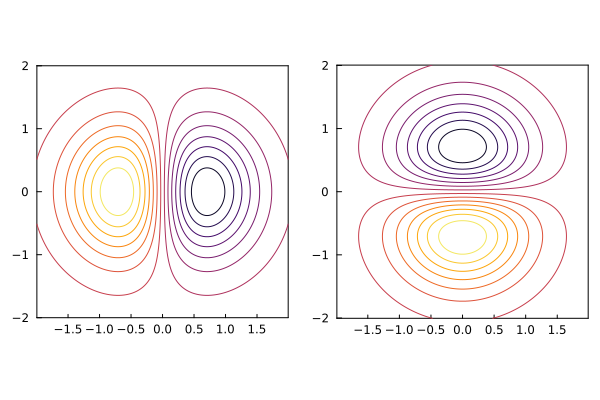

In [5]:
v = zeros_gridgrad(cache)
grad!(v,p,cache)
plot(v,cache)

We can then compute the derivative of this data

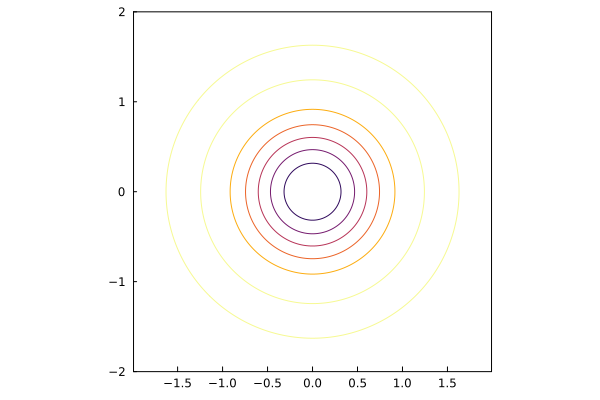

In [6]:
divv = zeros_grid(cache)
divergence!(divv,v,cache)
plot(divv,cache)

## Convective derivatives
And finally, let's compute convective derivatives. First, we will compute

$$\mathbf{v}\cdot\nabla p$$

For this operation, we create a special additional cache using `ConvectiveDerivativeCache`.
This extra cache holds additional memory for making the calculation of the convective derivative faster
if we compute it often.

In [7]:
cdcache = ConvectiveDerivativeCache(cache)
vdp = zeros_grid(cache)
convective_derivative!(vdp,v,p,cache,cdcache) #hide
@time convective_derivative!(vdp,v,p,cache,cdcache)
nothing #hide

  0.003680 seconds (18 allocations: 3.078 KiB)


Plot it

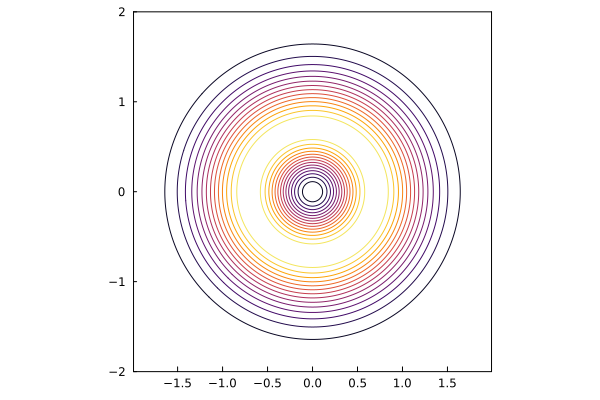

In [8]:
plot(vdp,cache)

Now, let's compute

$$\mathbf{v}\cdot\nabla\mathbf{v}$$

For this, we create a cache for `VectorGridData`, and a new instance of
`ConvectiveDerivativeCache` to go along with it.

In [9]:
vcache = SurfaceVectorCache(g,scaling=GridScaling)
vdv = zeros_grid(vcache)
cdvcache = ConvectiveDerivativeCache(vcache)
convective_derivative!(vdv,v,vcache,cdvcache) #hide
@time convective_derivative!(vdv,v,vcache,cdvcache)
nothing #hide

  0.010617 seconds (55 allocations: 8.875 KiB)


Plot it

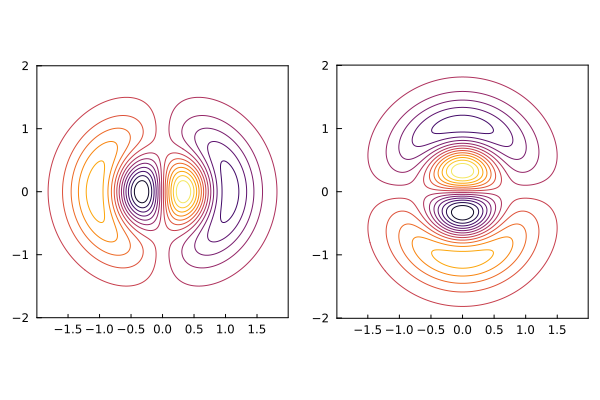

In [10]:
plot(vdv,vcache)

Finally, let's compute

$$(\curl\mathbf{v})\times\mathbf{v}$$

For this, we create a cache called
`RotConvectiveDerivativeCache` to go along with it.

In [11]:
w = zeros_gridcurl(vcache)
curl!(w,v,vcache)
wv = zeros_grid(vcache)
cdrcache = RotConvectiveDerivativeCache(vcache)
w_cross_v!(wv,w,v,vcache,cdrcache) #hide
@time w_cross_v!(wv,w,v,vcache,cdrcache)

  0.001593 seconds (5 allocations: 96 bytes)


Edges{Primal, 404, 406, Float64, Vector{Float64}} data
u (in grid orientation)
405×404 Matrix{Float64}:
 0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 ⋮                             ⋮    ⋱               ⋮                
 0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  0.0
 0.0  -0.0  -0.0  -0.0 

Plot it

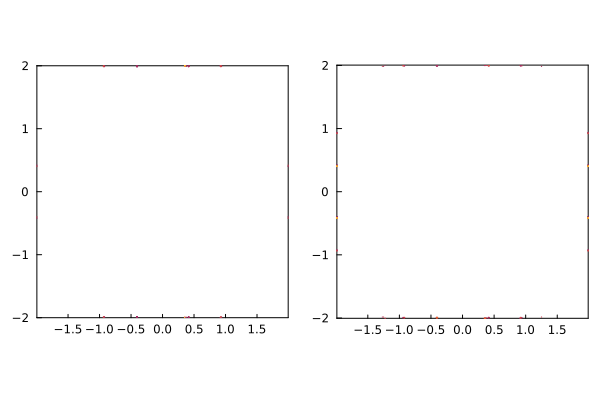

In [12]:
plot(wv,vcache)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*